In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style
plt.style.use('seaborn-v0_8')

In [2]:
pal = plt.rcParams['axes.prop_cycle'].by_key()['color']


p1 mean: 0.385881138254148
p2 mean: 0.4969757819720247
249
40
0.06968341402943573 0.5483526840812359


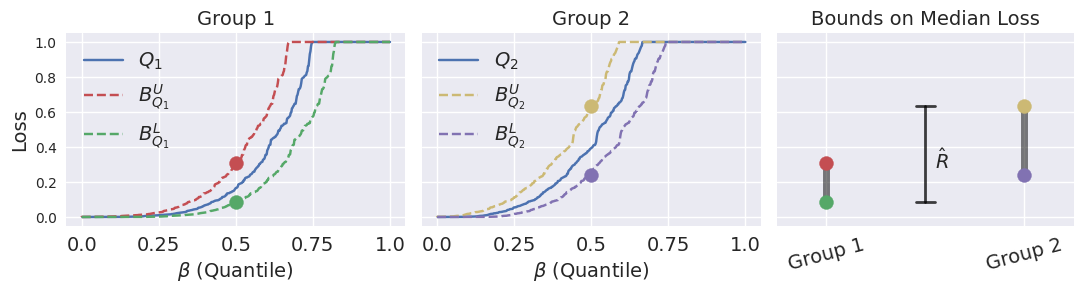

In [29]:
np.random.seed(42)

n_points = 500

mu1 = 0.25
sig1 = 3.5

mu2 = 0.3
sig2 = 4.5

plt.rcParams["figure.figsize"] = [13,2.5]

p1_loss = np.sort(
    np.clip(
        # np.random.normal(mu1, sig1, n_points),
        np.random.default_rng().gamma(mu1, sig1, n_points),
        0,
        1
    )
)
print("p1 mean:", np.mean(p1_loss))

p2_loss = np.sort(
    np.clip(
        # np.random.normal(mu2, sig2, n_points),
        np.random.default_rng().gamma(mu2, sig2, n_points),
        0,
        1
    )
)

print("p2 mean:", np.mean(p2_loss))

betas = ((np.arange(n_points)+1)/n_points)

bound_size = 0.08
b_size = 100

beta_var = 0.5
beta_var_idx = list(betas).index(beta_var)
print(beta_var_idx)

upper_bound_betas = np.clip(np.array(list(betas-bound_size)+[1-bound_size, 1.0]), 0, 1)[-n_points:]
lower_bound_betas = np.clip(np.array([0.0, bound_size]+list(betas+bound_size)), 0, 1)[:n_points]
bound_beta_offset = np.sum(upper_bound_betas == 0.0)+2
print(bound_beta_offset)

fig, axs = plt.subplots(1, 3, sharey="row", width_ratios=[0.4, 0.4, 0.35])
plt.subplots_adjust(
    wspace=0.05,
    # hspace=-0.1
)

p1_lower_bound = p1_loss[beta_var_idx-bound_beta_offset]
p1_upper_bound = p1_loss[beta_var_idx+bound_beta_offset]
axs[0].plot(betas, p1_loss, color=pal[0], label=r"$Q_1$")
axs[0].scatter(beta_var, p1_upper_bound, color=pal[2], s=b_size)
axs[0].plot(upper_bound_betas, p1_loss,  "--", color=pal[2], label=r"$B^U_{Q_1}$")
axs[0].plot(lower_bound_betas, p1_loss, "--", color=pal[1], label=r"$B^L_{Q_1}$")
axs[0].scatter(beta_var, p1_lower_bound, color=pal[1], s=b_size)

p2_lower_bound = p2_loss[beta_var_idx-bound_beta_offset]
p2_upper_bound = p2_loss[beta_var_idx+bound_beta_offset]
axs[1].plot(betas, p2_loss, color=pal[0], label=r"$Q_2$")
axs[1].scatter(beta_var, p2_upper_bound, color=pal[4], s=b_size)
axs[1].plot(upper_bound_betas, p2_loss,  "--", color=pal[4], label=r"$B^U_{Q_2}$")
axs[1].plot(lower_bound_betas, p2_loss, "--", color=pal[3], label=r"$B^L_{Q_2}$")
axs[1].scatter(beta_var, p2_lower_bound, color=pal[3], s=b_size)

axs[0].set_ylabel(r"Loss", fontsize=14)

for ax in axs[:2]:
    ax.set_xlabel(r"$\beta$ (Quantile)", fontsize=14)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks([0.0, 0.25, 0.5, 0.75, 1.0], labels=[0.0, 0.25, 0.5, 0.75, 1.0], fontsize=14)

axs[0].legend(fontsize=14)
axs[0].set_title("Group 1", fontsize=14)

axs[1].legend(fontsize=14)
axs[1].set_title("Group 2", fontsize=14)

max_diff =  max(
    p1_upper_bound-p2_lower_bound,
    p2_upper_bound-p1_lower_bound,
)

print(
    p1_upper_bound-p2_lower_bound,
    p2_upper_bound-p1_lower_bound,
)

axs[2].plot([1,1], [p1_lower_bound, p1_upper_bound], color="k", alpha=0.5, lw=5)
axs[2].scatter([1], [p1_lower_bound], color=pal[1], s=b_size, zorder=10)
axs[2].scatter([1], [p1_upper_bound], color=pal[2], s=b_size, zorder=10)

axs[2].plot([1.1,1.1], [p2_lower_bound, p2_upper_bound], color="k", alpha=0.5, lw=5)
axs[2].scatter([1.1], [p2_lower_bound], color=pal[3], s=b_size, zorder=10)
axs[2].scatter([1.1], [p2_upper_bound], color=pal[4], s=b_size, zorder=10)

axs[2].plot([1.045, 1.055], [p1_lower_bound, p1_lower_bound], color="k", alpha=0.75, lw=2)
axs[2].plot([1.05, 1.05], [p1_lower_bound, p2_upper_bound], color="k", alpha=0.75, lw=2)
axs[2].plot([1.045, 1.055], [p2_upper_bound, p2_upper_bound], color="k", alpha=0.75, lw=2)
axs[2].text(1.055, 0.275, r"$\hat R$", fontsize=14)

# axs[2].plot([1.2,1.2], [p1_lower_bound, p2_upper_bound], color="k", alpha=0.75, lw=5)
# axs[2].scatter([1.2], [p1_lower_bound], color=pal[1], s=b_size, zorder=10)
# axs[2].scatter([1.2], [p2_upper_bound], color=pal[4], s=b_size, zorder=10)


axs[2].set_xlim(0.975, 1.125)
axs[2].set_xticks([1,1.1], labels=["Group 1", "Group 2"], fontsize=14, rotation=15)
axs[2].set_ylim(-0.05, 1.05)

axs[2].set_title("Bounds on Median Loss", fontsize=14)

plt.savefig("../plots/figures/figure_4.png", bbox_inches="tight", dpi=600)
plt.show()

p1 mean: 0.27672568284978694
p2 mean: 0.4245221451243368
249
25
-0.0030362485273924683 0.29327176350360606
[0.044020094934468595, 0.11539756931137099, 0.11843381783876346, 0.3372918584380747, 0.29327176350360606] ['#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']


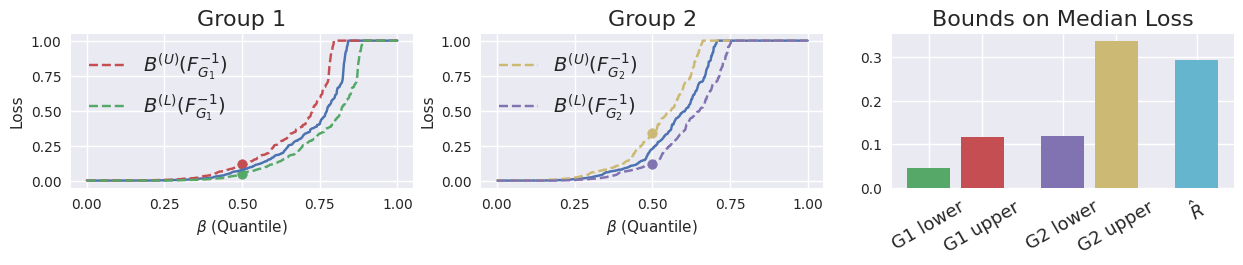

In [7]:
np.random.seed(0)

n_points = 500

mu1 = 0.2
sig1 = 3

mu2 = 0.25
sig2 = 4.5

plt.rcParams["figure.figsize"] = [15,2]

p1_loss = np.sort(
    np.clip(
        # np.random.normal(mu1, sig1, n_points),
        np.random.default_rng().gamma(mu1, sig1, n_points),
        0,
        1
    )
)
print("p1 mean:", np.mean(p1_loss))

p2_loss = np.sort(
    np.clip(
        # np.random.normal(mu2, sig2, n_points),
        np.random.default_rng().gamma(mu2, sig2, n_points),
        0,
        1
    )
)

print("p2 mean:", np.mean(p2_loss))

betas = ((np.arange(n_points)+1)/n_points)

bound_size = 0.05

beta_var = 0.5
beta_var_idx = list(betas).index(beta_var)
print(beta_var_idx)

upper_bound_betas = np.clip(np.array(list(betas-bound_size)+[1-bound_size, 1.0]), 0, 1)[-n_points:]
lower_bound_betas = np.clip(np.array([0.0, bound_size]+list(betas+bound_size)), 0, 1)[:n_points]
bound_beta_offset = np.sum(upper_bound_betas == 0.0)+2
print(bound_beta_offset)

fig, axs = plt.subplots(1, 3)

p1_lower_bound = p1_loss[beta_var_idx-bound_beta_offset]
p1_upper_bound = p1_loss[beta_var_idx+bound_beta_offset]
axs[0].plot(betas, p1_loss, color=pal[0])
axs[0].plot(upper_bound_betas, p1_loss,  "--", color=pal[2], label=r"$B^{(U)}(F^{-1}_{G_1})$")
axs[0].scatter(beta_var, p1_upper_bound, color=pal[2])
axs[0].plot(lower_bound_betas, p1_loss, "--", color=pal[1], label=r"$B^{(L)}(F^{-1}_{G_1})$")
axs[0].scatter(beta_var, p1_lower_bound, color=pal[1])

p2_lower_bound = p2_loss[beta_var_idx-bound_beta_offset]
p2_upper_bound = p2_loss[beta_var_idx+bound_beta_offset]
axs[1].plot(betas, p2_loss, color=pal[0])
axs[1].plot(upper_bound_betas, p2_loss,  "--", color=pal[4], label=r"$B^{(U)}(F^{-1}_{G_2})$")
axs[1].scatter(beta_var, p2_upper_bound, color=pal[4])
axs[1].plot(lower_bound_betas, p2_loss, "--", color=pal[3], label=r"$B^{(L)}(F^{-1}_{G_2})$")
axs[1].scatter(beta_var, p2_lower_bound, color=pal[3])

for ax in axs[:2]:
    ax.set_xlabel(r"$\beta$ (Quantile)")
    ax.set_ylabel(r"Loss")
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks([0.0, 0.25, 0.5, 0.75, 1.0])

axs[0].legend(fontsize=14)
axs[0].set_title("Group 1", fontsize=16)

axs[1].legend(fontsize=14)
axs[1].set_title("Group 2", fontsize=16)

max_diff =  max(
    p1_upper_bound-p2_lower_bound,
    p2_upper_bound-p1_lower_bound,
)

print(
    p1_upper_bound-p2_lower_bound,
    p2_upper_bound-p1_lower_bound,
)

bar_vals = [
    p1_loss[beta_var_idx-bound_beta_offset],
    p1_loss[beta_var_idx+bound_beta_offset],
    p2_loss[beta_var_idx-bound_beta_offset],
    p2_loss[beta_var_idx+bound_beta_offset],
    max_diff
]
bar_labels = [
    "G1 lower",
    "G1 upper",
    "G2 lower",
    "G2 upper",
    r"$\hat R$"
]
bar_cols = [pal[k] for k in range(1,len(bar_vals)+1)]
bar_xpos = [1,2,3.5,4.5,6]

print(bar_vals, bar_cols)
axs[2].bar(bar_xpos,bar_vals, color=bar_cols)
axs[2].set_xticks(bar_xpos, bar_labels, rotation=30, fontsize=13)
axs[2].set_title("Bounds on Median Loss", fontsize=16)

# axs[2].plot([2.75, 2.75], [p1_lower_bound, p2_upper_bound], "--", lw=2, color=bar_cols[-1], label="Bound on Median Difference")
# axs[2].legend(loc="lower left", frameon=True)

plt.savefig("../plots/figures/figure_4.png", bbox_inches="tight")
plt.show()

p1 mean: 0.3802271717035182
p2 mean: 0.4779845283420939
249
40
0.11143033144638309 0.45789017269470866


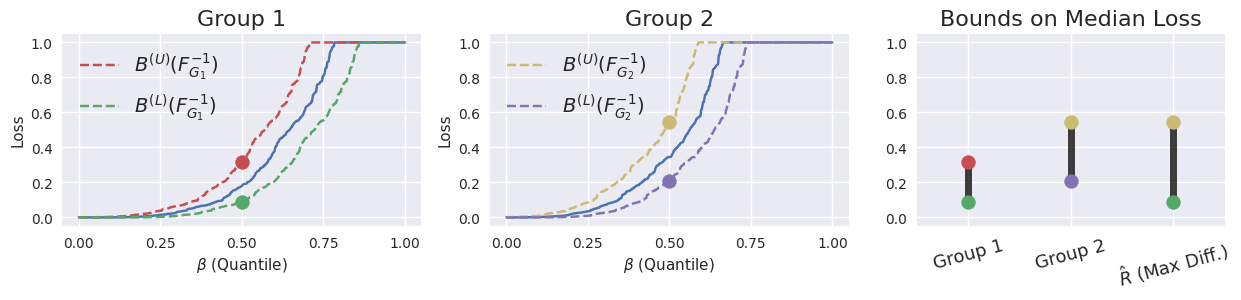

In [52]:
np.random.seed(42)

n_points = 500

mu1 = 0.25
sig1 = 3.5

mu2 = 0.3
sig2 = 4.5

plt.rcParams["figure.figsize"] = [15,2.5]

p1_loss = np.sort(
    np.clip(
        # np.random.normal(mu1, sig1, n_points),
        np.random.default_rng().gamma(mu1, sig1, n_points),
        0,
        1
    )
)
print("p1 mean:", np.mean(p1_loss))

p2_loss = np.sort(
    np.clip(
        # np.random.normal(mu2, sig2, n_points),
        np.random.default_rng().gamma(mu2, sig2, n_points),
        0,
        1
    )
)

print("p2 mean:", np.mean(p2_loss))

betas = ((np.arange(n_points)+1)/n_points)

bound_size = 0.08
b_size = 100

beta_var = 0.5
beta_var_idx = list(betas).index(beta_var)
print(beta_var_idx)

upper_bound_betas = np.clip(np.array(list(betas-bound_size)+[1-bound_size, 1.0]), 0, 1)[-n_points:]
lower_bound_betas = np.clip(np.array([0.0, bound_size]+list(betas+bound_size)), 0, 1)[:n_points]
bound_beta_offset = np.sum(upper_bound_betas == 0.0)+2
print(bound_beta_offset)

fig, axs = plt.subplots(1, 3, width_ratios=[0.35, 0.35, 0.3])

p1_lower_bound = p1_loss[beta_var_idx-bound_beta_offset]
p1_upper_bound = p1_loss[beta_var_idx+bound_beta_offset]
axs[0].plot(betas, p1_loss, color=pal[0])
axs[0].plot(upper_bound_betas, p1_loss,  "--", color=pal[2], label=r"$B^{(U)}(F^{-1}_{G_1})$")
axs[0].scatter(beta_var, p1_upper_bound, color=pal[2], s=b_size)
axs[0].plot(lower_bound_betas, p1_loss, "--", color=pal[1], label=r"$B^{(L)}(F^{-1}_{G_1})$")
axs[0].scatter(beta_var, p1_lower_bound, color=pal[1], s=b_size)

p2_lower_bound = p2_loss[beta_var_idx-bound_beta_offset]
p2_upper_bound = p2_loss[beta_var_idx+bound_beta_offset]
axs[1].plot(betas, p2_loss, color=pal[0])
axs[1].plot(upper_bound_betas, p2_loss,  "--", color=pal[4], label=r"$B^{(U)}(F^{-1}_{G_2})$")
axs[1].scatter(beta_var, p2_upper_bound, color=pal[4], s=b_size)
axs[1].plot(lower_bound_betas, p2_loss, "--", color=pal[3], label=r"$B^{(L)}(F^{-1}_{G_2})$")
axs[1].scatter(beta_var, p2_lower_bound, color=pal[3], s=b_size)

for ax in axs[:2]:
    ax.set_xlabel(r"$\beta$ (Quantile)")
    ax.set_ylabel(r"Loss")
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks([0.0, 0.25, 0.5, 0.75, 1.0])

axs[0].legend(fontsize=14)
axs[0].set_title("Group 1", fontsize=16)

axs[1].legend(fontsize=14)
axs[1].set_title("Group 2", fontsize=16)

max_diff =  max(
    p1_upper_bound-p2_lower_bound,
    p2_upper_bound-p1_lower_bound,
)

print(
    p1_upper_bound-p2_lower_bound,
    p2_upper_bound-p1_lower_bound,
)

axs[2].plot([1,1], [p1_lower_bound, p1_upper_bound], color="k", alpha=0.75, lw=5)
axs[2].scatter([1], [p1_lower_bound], color=pal[1], s=b_size, zorder=10)
axs[2].scatter([1], [p1_upper_bound], color=pal[2], s=b_size, zorder=10)

axs[2].plot([1.1,1.1], [p2_lower_bound, p2_upper_bound], color="k", alpha=0.75, lw=5)
axs[2].scatter([1.1], [p2_lower_bound], color=pal[3], s=b_size, zorder=10)
axs[2].scatter([1.1], [p2_upper_bound], color=pal[4], s=b_size, zorder=10)

axs[2].plot([1.2,1.2], [p1_lower_bound, p2_upper_bound], color="k", alpha=0.75, lw=5)
axs[2].scatter([1.2], [p1_lower_bound], color=pal[1], s=b_size, zorder=10)
axs[2].scatter([1.2], [p2_upper_bound], color=pal[4], s=b_size, zorder=10)


axs[2].set_xlim(0.95, 1.25)
axs[2].set_xticks([1,1.1,1.2], labels=["Group 1", "Group 2", r"$\hat R$ (Max Diff.)"], fontsize=13, rotation=15)
axs[2].set_ylim(-0.05, 1.05)

axs[2].set_title("Bounds on Median Loss", fontsize=16)

plt.savefig("../plots/figures/figure_4.png", bbox_inches="tight")
plt.show()